# Task-5: Exploratory data analysis-Sports

### Author: Jaswanth Kumar M

Considering myself as a sports analysts,I need to find out the most successfull teams, players and factors contributing win or loss of a team.

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
#reading datasets
ipl = pd.read_csv('D:/TSF/TSF Task 5/matches.csv')
deli = pd.read_csv("D:/TSF/TSF Task 5/deliveries.csv")

In [8]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
ipl.shape

(756, 18)

In [10]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
#no. of matches played in each season
ipl['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

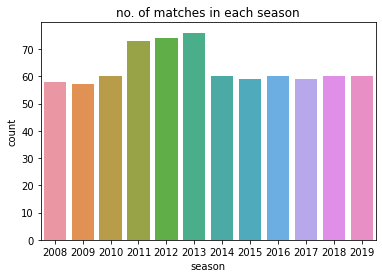

<Figure size 1008x576 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
sea = sns.countplot(data=ipl, x='season')
plt.title('no. of matches in each season')
plt.figure(figsize=(14,8))
plt.show()

In [13]:
ipl['win_by']=np.where(ipl['win_by_runs']>0, 'Bat first', 'Bowl first')

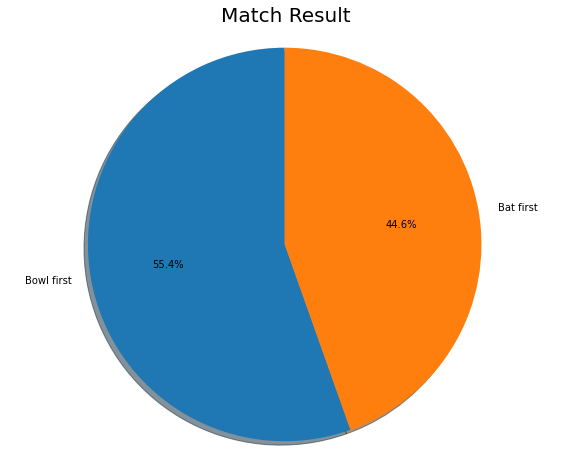

In [14]:
Win = ipl.win_by.value_counts()
labels=np.array(Win.index)
sizes=Win.values

plt.figure(figsize=(10,8))
plt.pie(sizes, labels= labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Match Result', fontsize=20)
plt.axis('equal')
plt.show()

The team which bowl first has a bit higher chance of winning the match

### Season's Winner

In [16]:
season_winner = ipl.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Player of the match

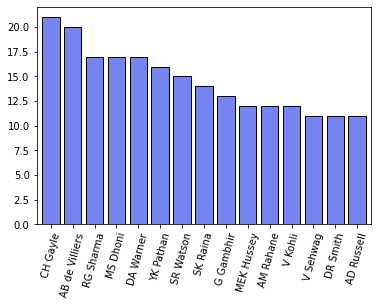

In [17]:
ply=ipl['player_of_match'].value_counts().head(15).plot.bar(width=0.8, color=(0.1, 0.2, 0.9, 0.6), edgecolor='black')
plt.xticks(rotation='75')
plt.show()

In [18]:
ipl['player_of_match'].value_counts()[0:15]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
V Sehwag          11
DR Smith          11
AD Russell        11
Name: player_of_match, dtype: int64

In [19]:
#toss impact on winner
np.sum(ipl['toss_winner']==ipl['winner'])

393

In [20]:
imp=393/756
imp

0.5198412698412699

Winning toss doesn't have impact on match winner

In [21]:
#no. of matches played in a city
ipl['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [22]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
deli.shape

(179078, 21)

Statistics

In [24]:
team_stats = pd.DataFrame({'Matches played': ipl.team1.value_counts() + ipl.team2.value_counts(), 'Total Won': ipl.winner.value_counts(), 'Total lost': ((ipl.team1.value_counts() + ipl.team2.value_counts()) - ipl.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace=True)
team_stats

,Teams,Matches played,Total Won,Total lost
0,Chennai Super Kings,164,100,64
1,Deccan Chargers,75,29,46
2,Delhi Capitals,16,10,6
3,Delhi Daredevils,161,67,94
4,Gujarat Lions,30,13,17
5,Kings XI Punjab,176,82,94
6,Kochi Tuskers Kerala,14,6,8
7,Kolkata Knight Riders,178,92,86
8,Mumbai Indians,187,109,78
9,Pune Warriors,46,12,34


Matches won by each team

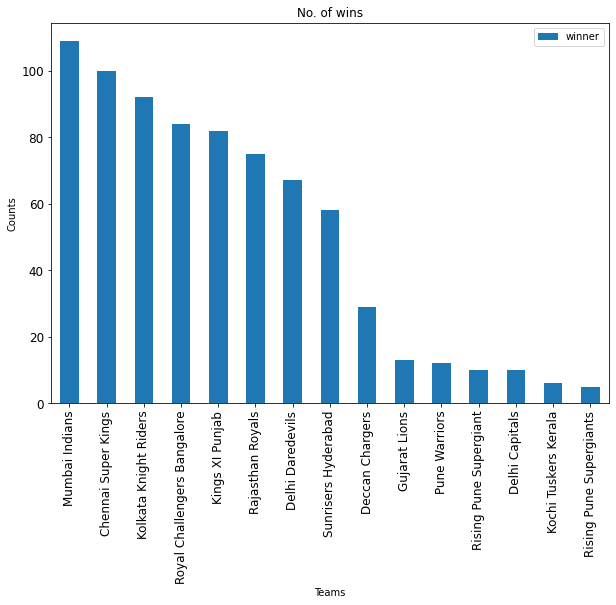

In [25]:
Total_won = ipl.winner.value_counts()
tw = Total_won.plot(kind='bar', title="No. of wins", figsize=(10,7), legend=True, fontsize=12)
tw.set_xlabel("Teams")
tw.set_ylabel("Counts")
plt.show()

 MI has the most number of wins matches.


Batsman runs

In [26]:
batsman_sum = deli.groupby("batsman").agg({'ball':'count', 'batsman_runs':'sum'})
batsman_sum.rename(columns={'ball':'balls', 'batsman_runs':'runs'}, inplace=True)
batsman_sum = batsman_sum.sort_values(['balls', 'runs'], ascending=False)
batsman_sum.head(n=10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


### Bowler with most wickets

In [27]:
wick_data = deli.dropna(subset=['dismissal_kind'])
wick_data = wick_data[~wick_data['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field'])]

In [28]:
wick_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


C:\Users\jashu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


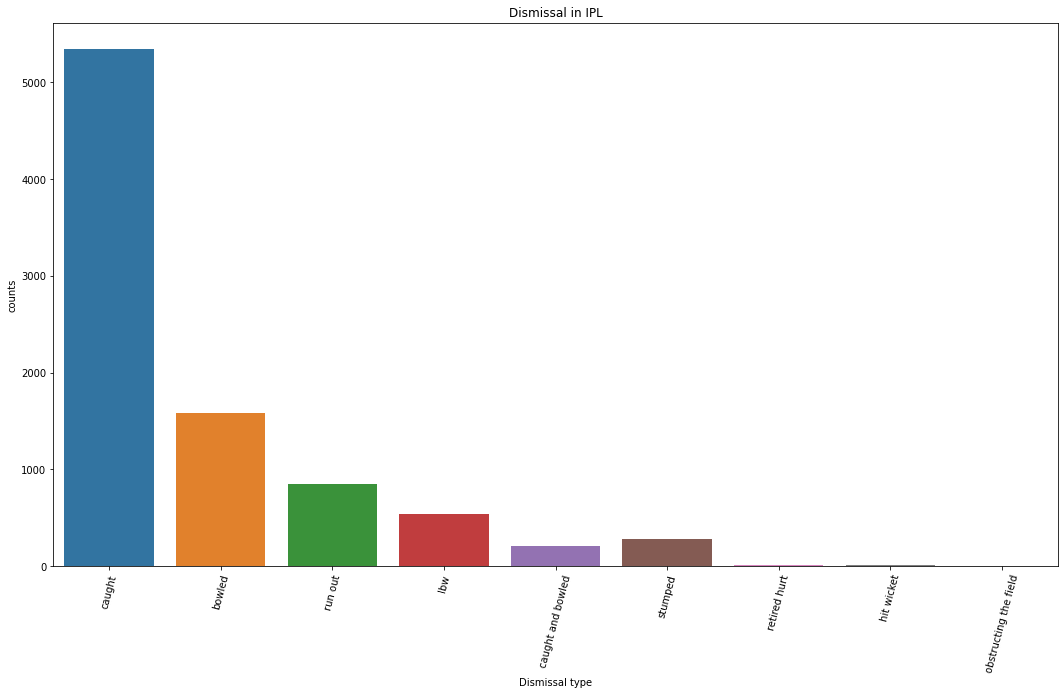

In [29]:
#dismissal types plot
plt.figure(figsize=(18, 10))
ax = sns.countplot(deli.dismissal_kind)
plt.title("Dismissal in IPL")
plt.xlabel("Dismissal type")
plt.ylabel("counts")
plt.xticks(rotation=75)
plt.show()

In [30]:
deli['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

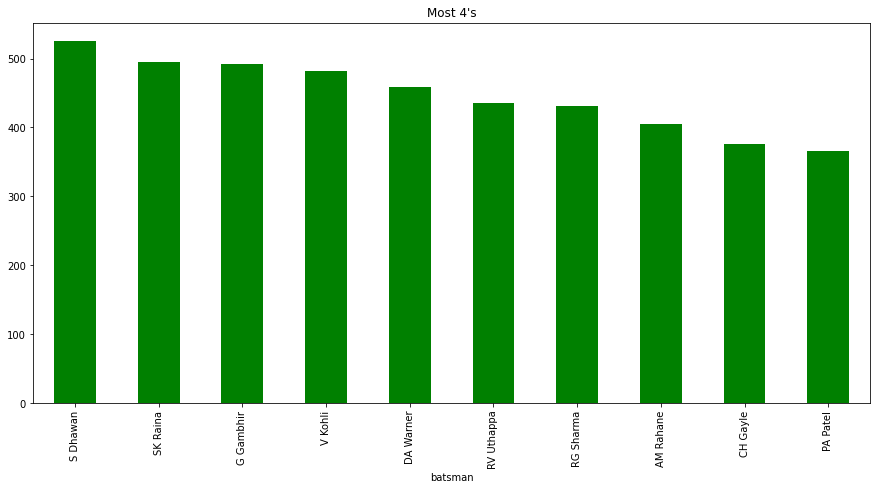

In [31]:
#player with most 4's
ply4 = deli[deli["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Most 4's", figsize=(15,7), color="green")
plt.show()

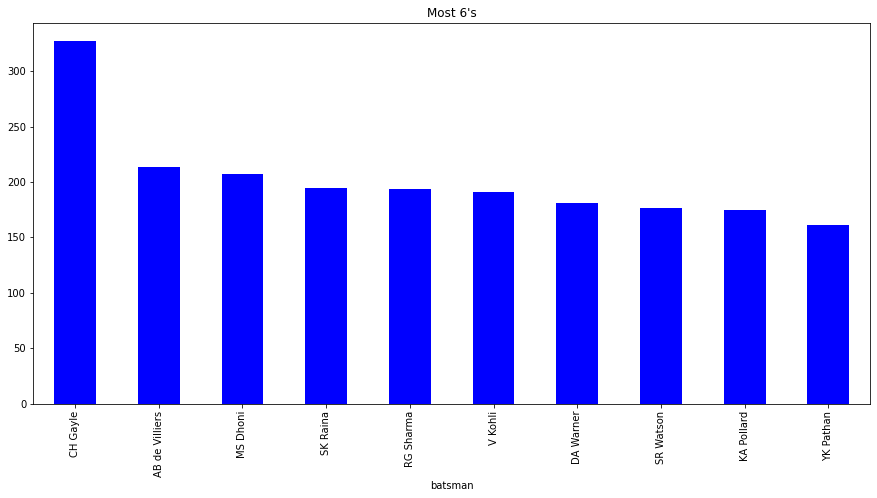

In [32]:
#player with most 6's
ply4 = deli[deli["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Most 6's", figsize=(15,7), color="blue")
plt.show()

In [33]:
#season won by teams
season_winner["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

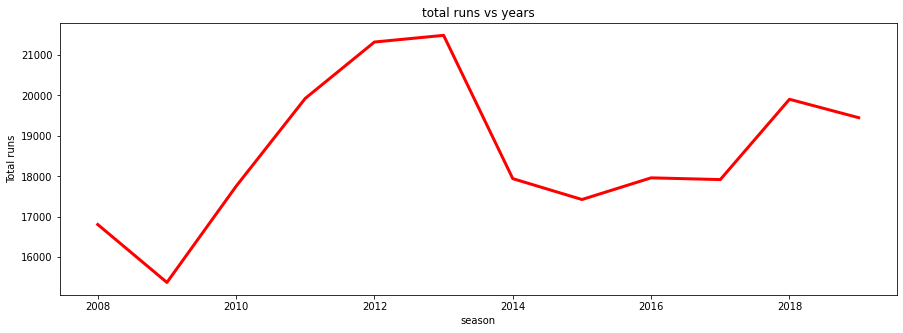

In [34]:
comb = pd.merge(deli, ipl, left_on='match_id', right_on='id')
comb.groupby('season')['batsman_runs'].sum().plot(kind='line', linewidth=3, figsize=(15,5), color='red')
plt.title("total runs vs years")
plt.xlabel("season")
plt.ylabel("Total runs")
plt.show()

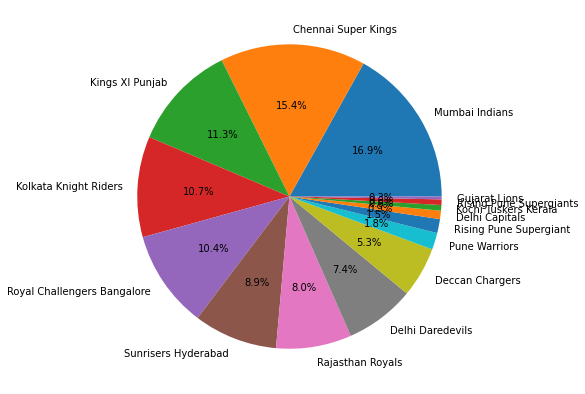

In [35]:
batting_first=ipl[ipl['win_by_runs']!=0]
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

# Conclusion
By all the graphs, we can conclude some points:

The highest number of matches was played in 2013's season with highest total runs

Mumbai Indian is the most successful team in IPL with 4 titles and won the most number of toss

Team which bowl first has a higher chances of winning the match

Top player of match winning are CH Gayle and AB de villers

The highest number of four hitted by Shikar Dhawan

The highest number of six hitted by CH Gayle

Most dismissal in IPL was by Catch out

Toss doesn't have impact on match's winner

Malinga has taken the most number of wickets in IPL

In top 10 bowlers, 5 are fast and medium pacers while other 5 are spinners

Top lead run scorer in IPL are Virat Kohli, SK Raina, RG Sharma

The fanchise must go for these players for game changing and consistant work